In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

# Загрузка и первичный обзор

In [227]:
print("first 5:")
display(df.head())

print("\nLast 5:")
display(df.tail())

print("\nDF info:")
df.info()

first 5:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea



Last 5:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea



DF info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


## Обработка пропущенных значений


In [228]:
print("before handling:")
print(df.isnull().sum())

df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

print("\after handling:")
print(df.isnull().sum())

before handling:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64
fter handling:
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


## Обработка дубликатов


In [229]:
print("before removal:", df.duplicated().sum())

df.drop_duplicates(inplace=True)

print("after removal:", df.duplicated().sum())


before removal: 0
after removal: 0


## Обнаружение и визуализация выбросов
 я считаю тут не нужны, так как это медицинские данные


## Генерация описательной статистики

In [230]:
print("df describe:")
print(df.describe())

print("\nUnique values and their:")
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


df describe:
        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%               

## Проведение корреляционного анализа


In [231]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df[num_cols].corr()
print("Correlation Matrix:")
display(correlation_matrix)

Correlation Matrix:


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,1.000000,0.990516,0.296305,0.431612,0.149882,-0.394287,-0.225467,0.043844
Age,0.990516,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.296305,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.431612,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.149882,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.394287,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225467,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.043844,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


## Создание визуализаций данных


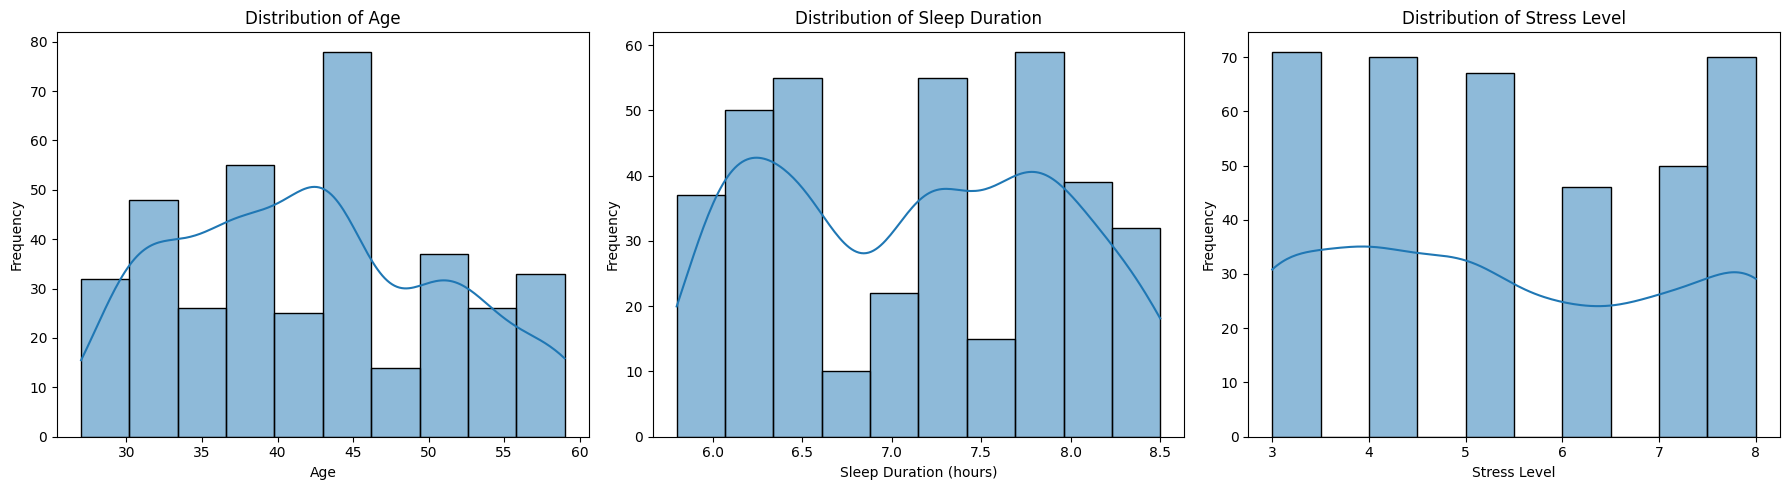

In [232]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df['Sleep Duration'], kde=True)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df['Stress Level'], kde=True)
plt.title('Distribution of Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


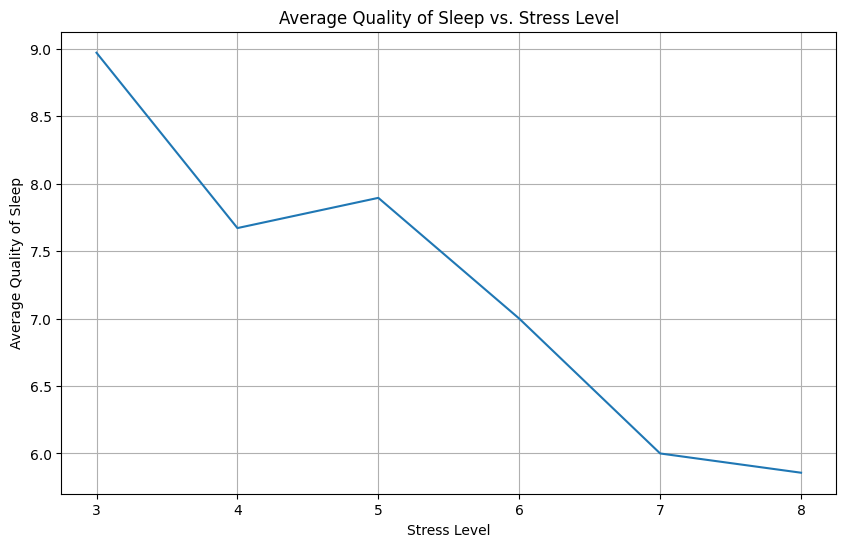

In [233]:
plt.figure(figsize=(10, 6))
mean_quality_by_stress = df.groupby('Stress Level')['Quality of Sleep'].mean().reset_index()
sns.lineplot(x='Stress Level', y='Quality of Sleep', data=mean_quality_by_stress)
plt.title('Average Quality of Sleep and Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Average Quality of Sleep')
plt.grid(True)
plt.show()

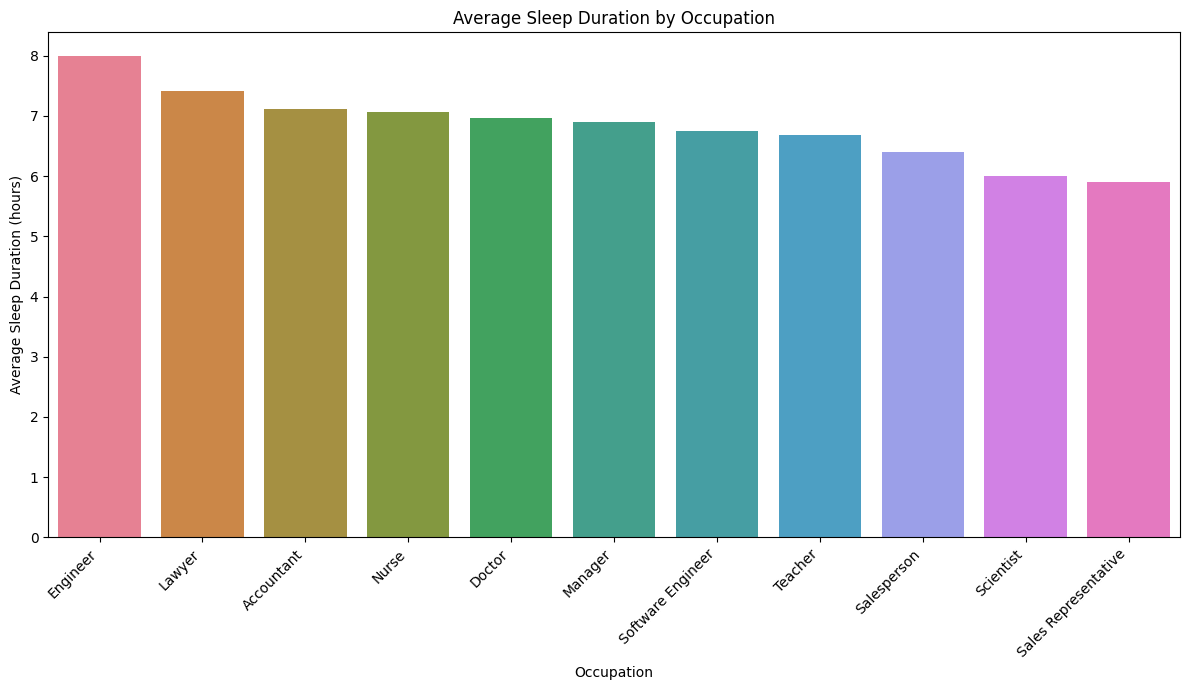

In [234]:
plt.figure(figsize=(12, 7))
mean_sleep_by_occupation = df.groupby('Occupation')['Sleep Duration'].mean().sort_values(ascending=False).reset_index()
sns.barplot(x='Occupation', y='Sleep Duration', data=mean_sleep_by_occupation, hue='Occupation', legend=False)
plt.title('Average Sleep Duration by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Sleep Duration (hours)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

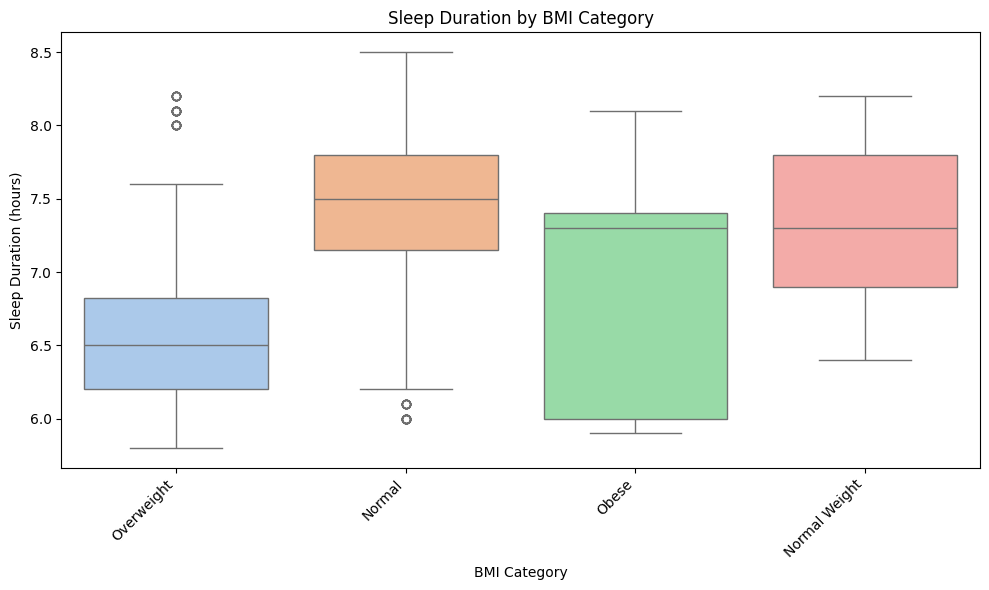

In [235]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI Category', y='Sleep Duration', data=df, hue='BMI Category', legend=False, palette='pastel')
plt.title('Sleep Duration by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

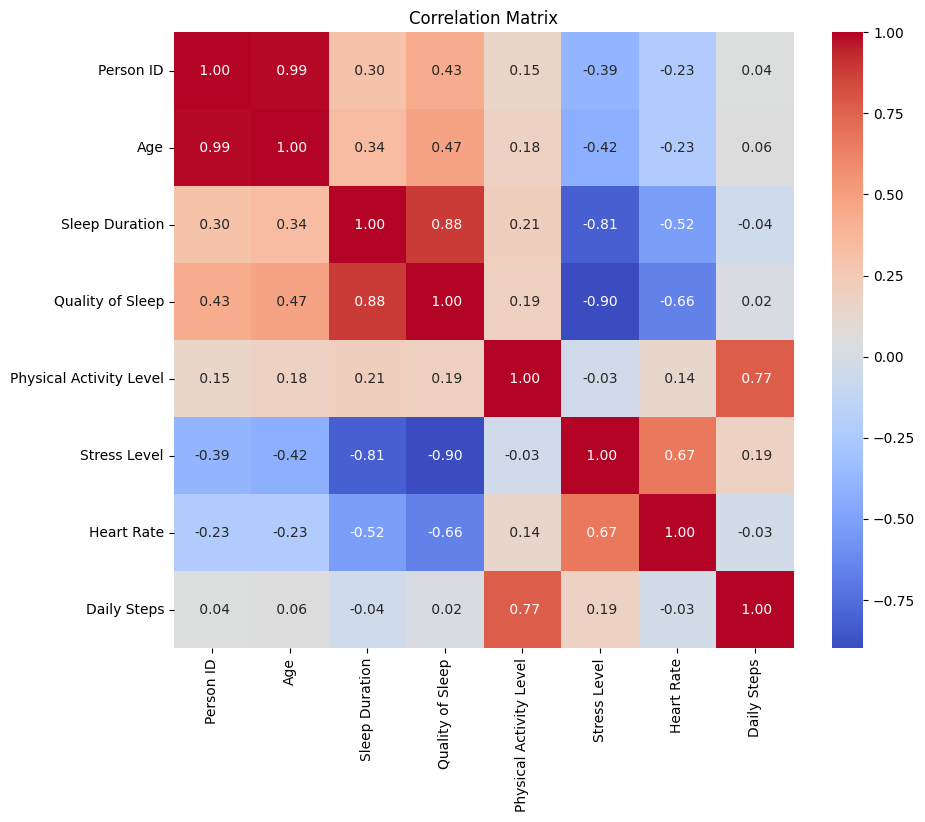

In [236]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='5.2f')
plt.title('Correlation Matrix')
plt.show()

## Группировки и агрегации



In [239]:
print("\nСредняя продолжительность и качество сна по роду занятий:")
occupation_sleep_summary = df.groupby('Occupation')[['Sleep Duration', 'Quality of Sleep']].mean().sort_values(by='Sleep Duration', ascending=False)
display(occupation_sleep_summary)

print("\nКоличество людей по категории ИМТ:")
bmi_category_count = df.groupby('BMI Category').size()
display(bmi_category_count)

print("\nСуммарное количество шагов по полу:")
gender_daily_steps_sum = df.groupby('Gender')['Daily Steps'].sum()
display(gender_daily_steps_sum)

print("\nСводная таблица: Средняя продолжительность сна в зависимости от пола и расстройства сна:")
pivot_table_sleep_duration = pd.pivot_table(df, values='Sleep Duration', index='Gender', columns='Sleep Disorder', aggfunc='mean')
display(pivot_table_sleep_duration)


Средняя продолжительность и качество сна по роду занятий:


,Sleep Duration,Quality of Sleep
Occupation,,
Engineer,7.987302,8.412698
Lawyer,7.410638,7.893617
Accountant,7.113514,7.891892
Nurse,7.063014,7.369863
Doctor,6.970423,6.647887
Manager,6.900000,7.000000
Software Engineer,6.750000,6.500000
Teacher,6.690000,6.975000
Salesperson,6.403125,6.000000



Количество людей по категории ИМТ:


,0
BMI Category,
Normal,195
Normal Weight,21
Obese,10
Overweight,148



Суммарное количество шагов по полу:


,Daily Steps
Gender,
Female,1265500
Male,1284000



Сводная таблица: Средняя продолжительность сна в зависимости от пола и расстройства сна:


Sleep Disorder,Insomnia,None,Sleep Apnea
Gender,,,
Female,6.633333,7.650000,7.035821
Male,6.551220,7.183942,7.009091
